# Análise do novo coronavírus e casos da COVID-19 no Brasil
## Os dados usados abaixo são de um dadaset disponível no [kaggle](https://www.kaggle.com/unanimad/corona-virus-brazil) e baixado no dia de 07/04

### Código padrão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#import pandas_profiling as pp

In [2]:
# !kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

#### Dataset

In [3]:
covid_BR_19 = pd.read_csv(r'C:\Users\mateu\OneDrive\Documentos\Programação\dados\brazil_covid19_07_04.csv')
covid_BR_19 = covid_BR_19.drop(columns=['region']).copy()
covid_BR_19.head()

,date,state,cases,deaths
0,2020-01-30,Distrito Federal,0,0
1,2020-01-30,Goiás,0,0
2,2020-01-30,Mato Grosso,0,0
3,2020-01-30,Mato Grosso do Sul,0,0
4,2020-01-30,Alagoas,0,0


### A primeira análise será feita dia a dia para o estado do Rio de Janeiro

#### code

##### os dados foram separados por data

In [4]:
corona_data = covid_BR_19.groupby(['date', 'state'], sort=True).sum()
corona_data.head(10) #.shape

cases  deaths
date       state                          
2020-01-30 Acre                  0       0
           Alagoas               0       0
           Amapá                 0       0
           Amazonas              0       0
           Bahia                 0       0
           Ceará                 0       0
           Distrito Federal      0       0
           Espírito Santo        0       0
           Goiás                 0       0
           Maranhão              0       0

##### foram separados somente os dados do estado do Rio

In [5]:
corona_RJ = covid_BR_19.loc[(covid_BR_19.state=='Rio de Janeiro')]#.reset_index()
corona_RJ.head()  #59 linhas

,date,state,cases,deaths
22,2020-01-30,Rio de Janeiro,0,0
49,2020-01-31,Rio de Janeiro,0,0
76,2020-02-01,Rio de Janeiro,0,0
103,2020-02-02,Rio de Janeiro,0,0
130,2020-02-03,Rio de Janeiro,0,0


#### Número de casos

In [6]:
corona_RJ = corona_RJ.loc[(corona_RJ.cases>0)]
#corona_RJ.head(4)
corona_RJ_casos = corona_RJ.filter(items=['date', 'cases'])
corona_RJ_casos.head()

,date,cases
967,2020-03-05,1
994,2020-03-06,1
1021,2020-03-07,2
1048,2020-03-08,3
1075,2020-03-09,3


#### numero de mortes

In [7]:
corona_RJ_mortes = corona_RJ.loc[(corona_RJ.deaths>0)]
corona_RJ_mortes = corona_RJ_mortes.filter(items=['date', 'deaths'])
corona_RJ_mortes.head()

,date,deaths
1345,2020-03-19,2
1372,2020-03-20,2
1399,2020-03-21,3
1426,2020-03-22,3
1453,2020-03-23,4


#### grafico RJ

##### numero de casos por dia

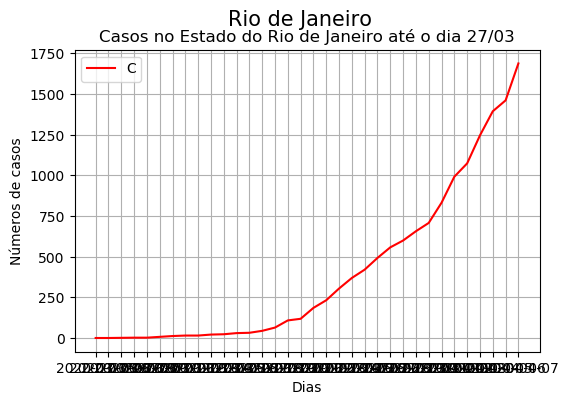

In [8]:
fig, ax = plt.subplots(dpi=100)
fig.suptitle('Rio de Janeiro', fontsize=15)
ax.plot(corona_RJ.date, corona_RJ.cases, 'r', label='Casos')
ax.set_title("Casos no Estado do Rio de Janeiro até o dia 27/03")
ax.grid(True)
ax.set_xlabel("Dias")
ax.set_ylabel("Números de casos")
ax.legend('Casos')

##### Numero de morte por dia

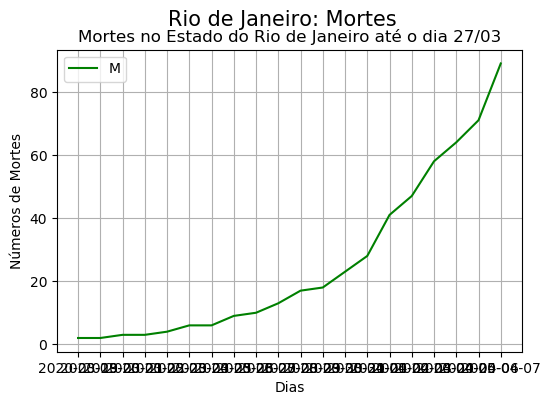

In [9]:
fig, ax = plt.subplots(dpi=100)
fig.suptitle('Rio de Janeiro: Mortes', fontsize=15)
ax.plot(corona_RJ_mortes.date, corona_RJ_mortes.deaths, 'g', label='Mortes')
ax.set_title("Mortes no Estado do Rio de Janeiro até o dia 27/03")
ax.grid(True)
ax.set_xlabel("Dias")
ax.set_ylabel("Números de Mortes")
ax.legend('Mortes')

# ideias
- morte pop total
- casos menos recuperados
- analise por estado
- descobrir curva de tendencia

   ### outras referencias
   [Notebook kaggle sobre o COVID (outro dataset)](https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons)<br>
   https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

# Atualização:
## Utilizando os dados desse notebook, aprimorar os gráficos - 22/04

## Exemplos

### Peixe babel

NameError: name 'dados' is not defined

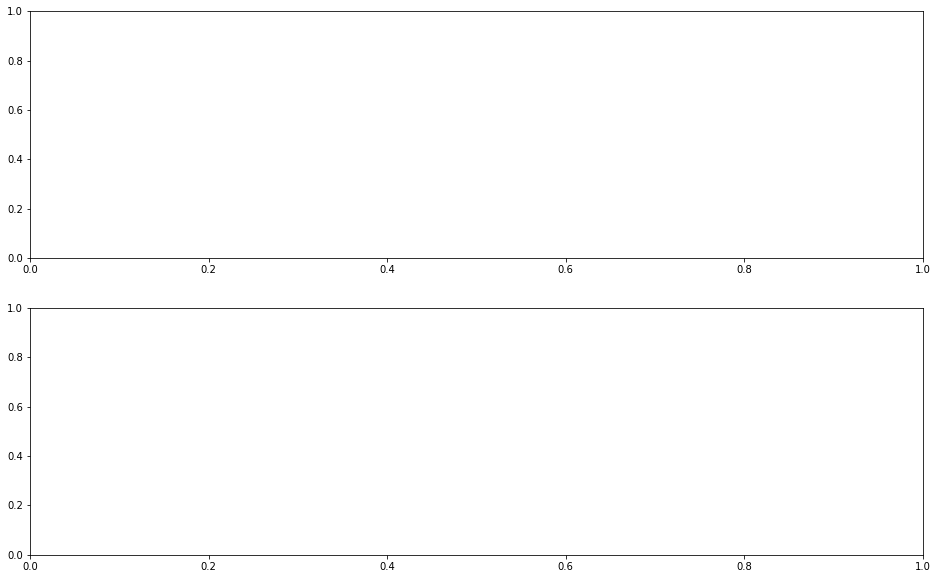

In [12]:

fig, ax = plt.subplots(2,1,figsize=(16, 10))
sns.lineplot(np.arange(len(dados['Data'])), dados['CA'], ax=ax[1], color='k', linestyle='dashed')   # não faço ideia
ax[1].set_title('Quantidade Acumulada de Casos (China)') 
ax[1].set_xticks(np.arange(len(dados['Data'])))
ax[1].set_xticklabels(dados['Data'])

clrs = ['darkblue' if (x < 13) else 'red' for x in np.arange(len(dados['Data'])) ]
sns.barplot(np.arange(len(dados['Data'])), dados['Confirmados'], palette=clrs, ax=ax[0], label=None)
ax[0].set_title('Novos casos por dia (China)', fontsize=14)
ax[0].set_xticks(np.arange(len(dados['Data'])))
ax[0].set_xticklabels(dados['Data'], rotation=90)
ax[0].set_frame_on(False)
ax[0].tick_params(axis='both', which='both', length=0)

fig.tight_layout(pad=2.0)
plt.xticks(rotation=90)
plt.savefig('china-pordia.svg', format='svg', dpi=300)
#plt.show()

### Exemplo 2 : https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/solutions/2.1-bar_and_fill_between.py

## Gráficos

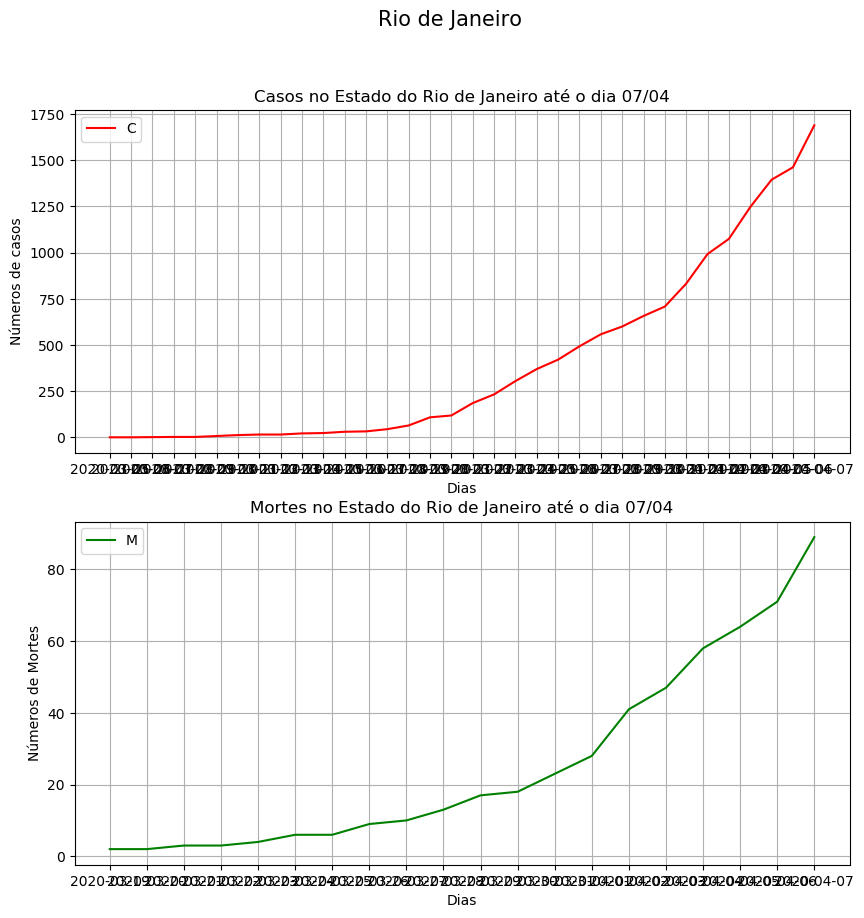

In [35]:

import seaborn as sns
# grafico 01
fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=100)
fig.suptitle('Rio de Janeiro', fontsize=15)
ax[0].plot(corona_RJ.date, corona_RJ.cases, 'r', label='Casos')
ax[0].set_title("Casos no Estado do Rio de Janeiro até o dia 07/04")
ax[0].grid(True)
ax[0].set_xlabel("Dias")
ax[0].set_ylabel("Números de casos")
ax[0].legend('Casos')

# grafico 02
#fig, ax = plt.subplots(dpi=100)
#fig.suptitle('Rio de Janeiro: Mortes', fontsize=15)
ax[1].plot(corona_RJ_mortes.date, corona_RJ_mortes.deaths, 'g', label='Mortes')
ax[1].set_title("Mortes no Estado do Rio de Janeiro até o dia 07/04")
ax[1].grid(True)
ax[1].set_xlabel("Dias")
ax[1].set_ylabel("Números de Mortes")
ax[1].legend('Mortes')

plt.show()